 # T2 DIMENSIONALITY REDUCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# EXAMPLE 1: 2D Random Data

In [2]:
# Define the angle in radians for rotation (pi/5 radians, which is 36 degrees)
angle = np.pi / 5

# Set the stretch factor for the x-axis (stretching by a factor of 5)
stretch = 5

# Define the number of data points to generate (200 data points)
m = 200

In [3]:
# Set a random seed for reproducibility
np.random.seed(3)

# Generate random data points with dimensions 'm' by 2, scaled down by 10
X = np.random.randn(m, 2) / 10

# Stretch the data points along the x-axis by a factor of 'stretch'
X = X.dot(np.array([[stretch, 0], [0, 1]]))  # stretch

# Rotate the stretched data points counterclockwise by an 'angle' (in radians)
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])  # rotate

In [4]:
X_std = StandardScaler().fit_transform(X)
np.mean(X_std, axis=0)

array([-1.77635684e-17, -8.60422844e-18])

In [5]:
X_std.shape

(200, 2)

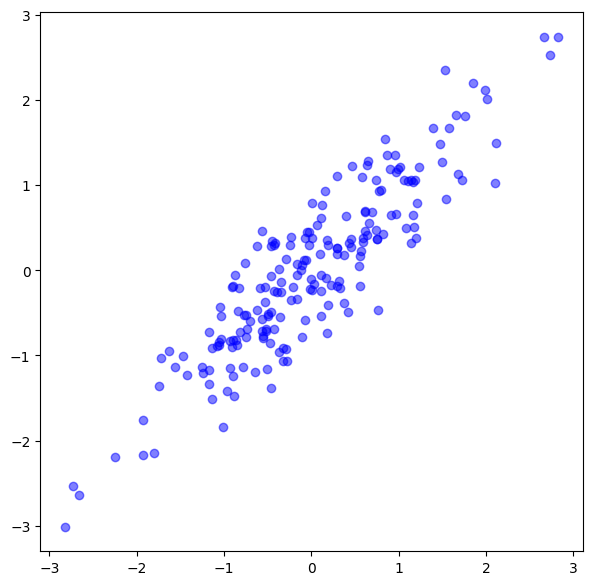

In [6]:
# Plot blue circles at the data points in 'X' with a slight transparency (alpha=0.5)
plt.figure(figsize=(7, 7))
plt.plot(X_std[:, 0], X_std[:, 1], "bo", alpha=0.5)
plt.show()

In [7]:
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00502513 0.90575658]
 [0.90575658 1.00502513]]


In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[0.09926855 1.9107817 ]


In [229]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.9107817040282047
0.09926854722807799


In [230]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

[95.06138977540313, 4.938610224596877]


## Projection onto Eigenvectors

In [231]:
u1 = eig_vecs[0]
u2 = eig_vecs[1]

In [232]:
X_proj1 = X_std.dot(u1.reshape(-1, 1))
X_proj2 = X_std.dot(u2.reshape(-1, 1))

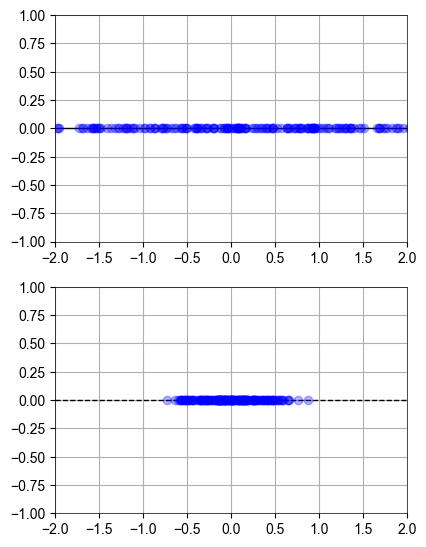

In [233]:
plt.figure(figsize=(10, 10))
plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

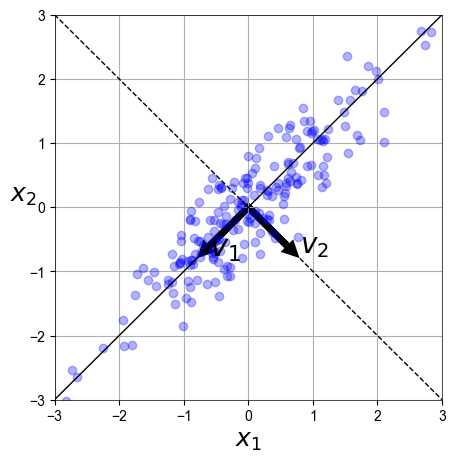

In [234]:
plt.figure(figsize=(5, 5))
plt.plot(X_std[:, 0], X_std[:, 1], "bo", alpha=0.3)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc="k", ec="k")
plt.arrow(0, 0, u2[0], u2[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc="k", ec="k")
plt.plot([-4, 4], [-4 * u1[1] / u1[0], 4 * u1[1] / u1[0]], "k-", linewidth=1)
plt.plot([-4, 4], [-4 * u2[1] / u2[0], 4 * u2[1] / u2[0]], "k--", linewidth=1)
plt.grid(True)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$v_1$", fontsize=22)
plt.text(u2[0] + 0.1, u2[1], r"$v_2$", fontsize=20)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
# Set the axis limits for the plot
plt.axis([-3, 3, -3, 3])
plt.show()

In [235]:
z1 = np.dot(X, u1)

In [236]:
z2 = np.dot(X, u2)

In [237]:
df = pd.DataFrame({'Z1': z1, 'Z2': z2})

print('PCA Scores for Z1 and Z2 Latent vectors')

df.head(10)

PCA Scores for Z1 and Z2 Latent vectors


,Z1,Z2
0,-0.890132,0.096788
1,-0.018503,0.191603
2,0.142536,0.013343
3,0.050670,0.055456
4,0.029105,0.043707
5,0.635006,-0.190140
6,-0.461977,-0.099918
7,-0.018378,0.043883
8,0.293515,0.110087
9,-0.467912,0.185589


# EXAMPLE 2: Reconstruction

In [238]:
np.random.seed(42)
# Generate Data
n = 50
var = 3
corr = .5

In [239]:
cov_mat = [[var, corr * var], [corr * var, var]]
X = np.random.multivariate_normal([0, 0], cov_mat, n)

In [240]:
X.shape

(50, 2)

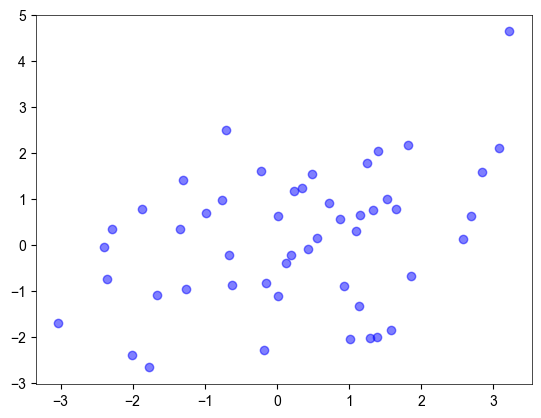

In [241]:
plt.plot(X[:,0], X[:, 1], "bo", alpha=0.5)

In [242]:
X_mean = np.mean(X, axis=0)
X_mean

array([0.26588235, 0.14114455])

In [243]:
# Project Data onto PCA line
from sklearn.decomposition import PCA
subspace_dim = 1
pca = PCA(subspace_dim)
X_reconstr = pca.inverse_transform(pca.fit_transform(X))

In [244]:
X[:5]

array([[-0.62533083, -0.86481163],
       [-2.29051535,  0.34744974],
       [ 0.55399861,  0.14846151],
       [-3.03343719, -1.70420125],
       [ 0.2343408 ,  1.17408236]])

In [245]:
pca.fit_transform(X)[:5]

array([[-1.3354642 ],
       [-1.7611401 ],
       [ 0.21894896],
       [-3.68638539],
       [ 0.66797933]])

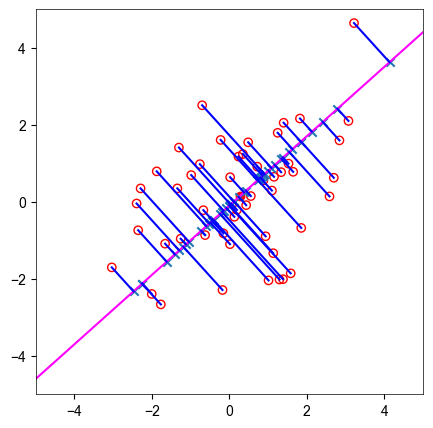

In [246]:
# Create figure and save.
fig, ax = plt.subplots(figsize=(5, 5))

# Plot raw data
ax.scatter(X[:, 0], X[:, 1], marker='o', facecolor='none', edgecolor='red')
X_mean = np.mean(X, axis=0)
ax.scatter(X_mean[0], X_mean[1], facecolor='red')

# Plot PCA line
low_point = X_mean - 10 * pca.components_.reshape(-1)
high_point = X_mean + 10 * pca.components_.reshape(-1)
ax.plot([low_point[0], high_point[0]], [low_point[1], high_point[1]], color='magenta')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

# Plot projected points
ax.scatter(X_reconstr[:, 0], X_reconstr[:, 1], marker='x')

# Plot projection lines
for (xi1, xi2), (xi1_rec, xi2_rec) in zip(X, X_reconstr):
    ax.plot([xi1, xi1_rec], [xi2, xi2_rec], color='blue')

plt.show()

# Digits PCA

In [247]:
try:
    from tensorflow import keras
except ModuleNotFoundError:
    %pip install -qq tensorflow
    from tensorflow import keras
import tensorflow as tf

In [248]:
# define plots common properties and color constants
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.linewidth"] = 0.5
GRAY1, GRAY4, GRAY7 = "#231F20", "#646369", "#929497"

In [249]:
if 1:
    mnist = keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    ndx = np.arange(1000)
    nsamples, nrows, ncols = train_images.shape
    X_train = np.reshape(train_images, (nsamples, nrows * ncols))
    X_train = X_train[ndx, :]
    y_train = train_labels[ndx]
    w = 30  # 28+2

In [250]:
n_samples, n_features = X_train.shape
print(X_train.shape)
img_size = int(np.sqrt(n_features))

(1000, 784)


In [251]:
idx_3 = np.where(y_train == 3)[0]
X_train_3 = X_train[idx_3]

In [252]:
X_train_3_pca = PCA(n_components=2).fit_transform(X_train_3)

# Calculate percentiles for creating a grid for plotting
x_grid = np.percentile(X_train_3_pca[:, 0], [5, 25, 50, 75, 95])
y_grid = np.percentile(X_train_3_pca[:, 1], [5, 25, 50, 75, 95])

# Set the center of the grid to (0, 0)
x_grid[2], y_grid[2] = 0, 0

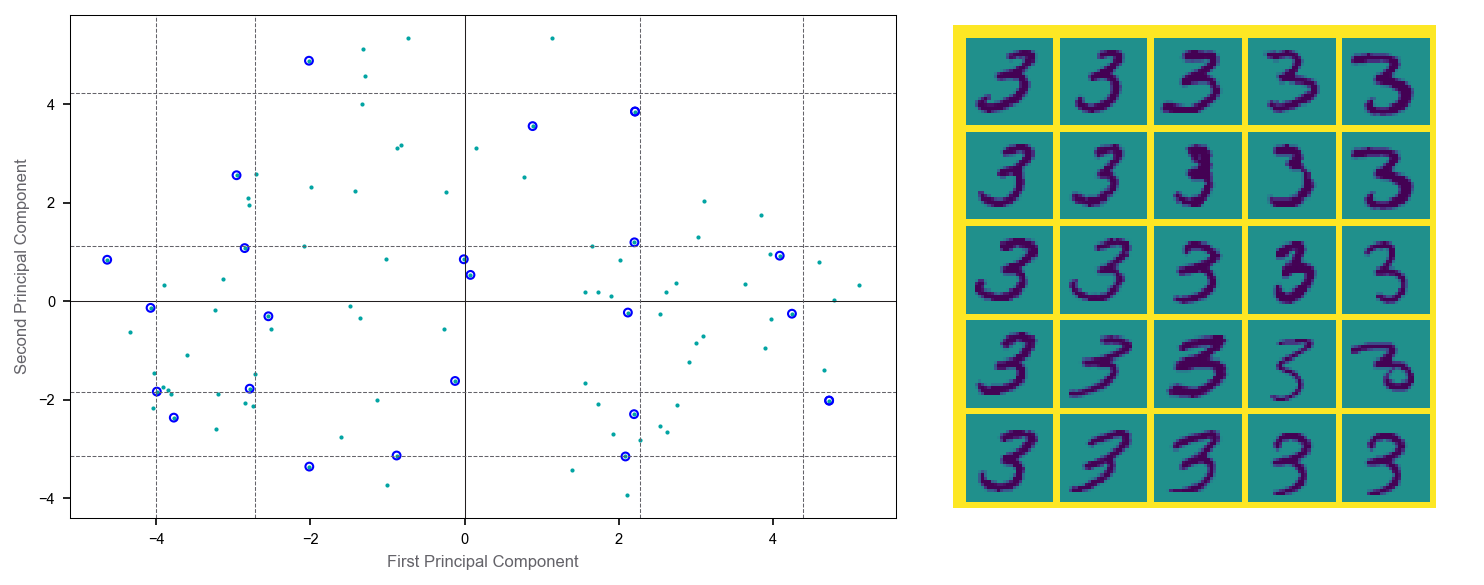

In [253]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 4), dpi=150, gridspec_kw=dict(width_ratios=[3, 2]))
plt.subplots_adjust(wspace=0.1)
for s in axarr[1].spines.values():
    s.set_visible(False)
axarr[1].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
ax = axarr[0]
ax.scatter(X_train_3_pca[:, 0], X_train_3_pca[:, 1], s=1, color="#02A4A3")
ax.set_xlabel("First Principal Component", color=GRAY4, fontsize=8)
ax.set_ylabel("Second Principal Component", color=GRAY4, fontsize=8)
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(7)
ax.axhline(0, linewidth=0.5, color=GRAY1)
ax.axvline(0, linewidth=0.5, color=GRAY1)
for i in range(5):
    if i != 2:
        ax.axhline(y_grid[i], linewidth=0.5, color=GRAY4, linestyle="--")
        ax.axvline(x_grid[i], linewidth=0.5, color=GRAY4, linestyle="--")

# Create an image representation of the data based on percentiles and plot it on the second subplot
img = np.ones(shape=(4 + w * 5, 4 + w * 5))
for i in range(5):
    for j in range(5):
        v = X_train_3_pca - np.array([x_grid[i], y_grid[j]])
        v = np.sqrt(np.sum(v**2, axis=-1))
        idx = np.argmin(v)
        ax.scatter(
            X_train_3_pca[idx : idx + 1, 0],
            X_train_3_pca[idx : idx + 1, 1],
            s=14,
            facecolors="none",
            edgecolors="b",
            linewidth=1,
        )
        img[j * w + 4 : j * w + 4 + img_size, i * w + 4 : i * w + 4 + img_size] = -X_train_3[idx].reshape(
            (img_size, img_size)
        )

ax = axarr[1]
ax.imshow(img)
ax.set_aspect("equal", "datalim")
plt.tight_layout()
plt.show()


# Choosing the number of latent dimensions.

In [254]:
try:
    from sklearn.decomposition import PCA
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

In [255]:
try:
    from tensorflow import keras
except ModuleNotFoundError:
    %pip install -qq tensorflow
    from tensorflow import keras
import warnings
from sklearn.metrics import mean_squared_error

In [256]:
warnings.simplefilter("ignore", RuntimeWarning)  # for some NaN values

In [257]:

# Standard mnist dataset

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[train_labels == 3]  # select images of digit '3'

In [258]:
n_images = 1000
train_images = train_images[0:n_images, :, :]
n_samples, n_rows, n_cols = train_images.shape
X = np.reshape(train_images, (n_samples, n_rows * n_cols))

X_train = X[0 : int(n_images / 2), :]  # 500 images in train set
X_test = X[int(n_images / 2) :, :]  # 500 images in test set

In [259]:
# Reconstruction error on MNIST vs number of latent dimensions used by PCA

X_rank = np.linalg.matrix_rank(X_train)
K_linspace = np.linspace(1, 0.75 * X_rank, 10, dtype=int)
Ks = np.unique(np.append([1, 5, 10, 20], K_linspace))

RMSE_train = np.arange(len(Ks))
RMSE_test = np.arange(len(Ks))

In [260]:
for index, K in enumerate(Ks):
    pca = PCA(n_components=K)

    Xtrain_transformed = pca.fit_transform(X_train)
    Xtrain_proj = pca.inverse_transform(Xtrain_transformed)
    RMSE_train[index] = mean_squared_error(X_train, Xtrain_proj, squared=False)

    Xtest_transformed = pca.transform(X_test)
    Xtest_proj = pca.inverse_transform(Xtest_transformed)
    RMSE_test[index] = mean_squared_error(X_test, Xtest_proj, squared=False)

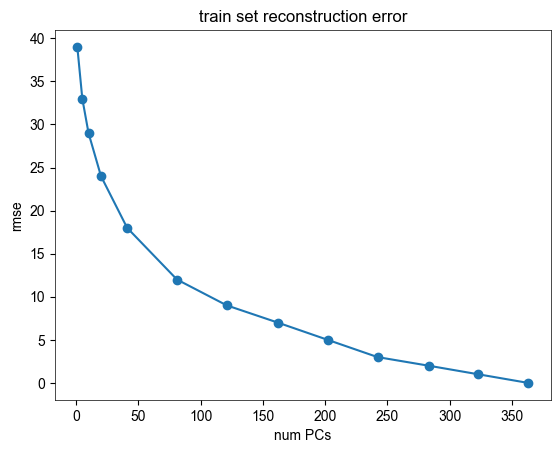

In [261]:
# Fraction of variance explained
pca = PCA(n_components=X_rank)
X_transformed = pca.fit_transform(X_train)
evals = pca.explained_variance_  # eigenvalues in descending order

fraction_var = np.cumsum(evals[0:50] / np.sum(evals))

fig, ax = plt.subplots()
xs = Ks
ys = RMSE_train
plt.title("train set reconstruction error")
plt.xlabel("num PCs")
plt.ylabel("rmse")
ax.plot(xs, ys, marker="o")
plt.show()

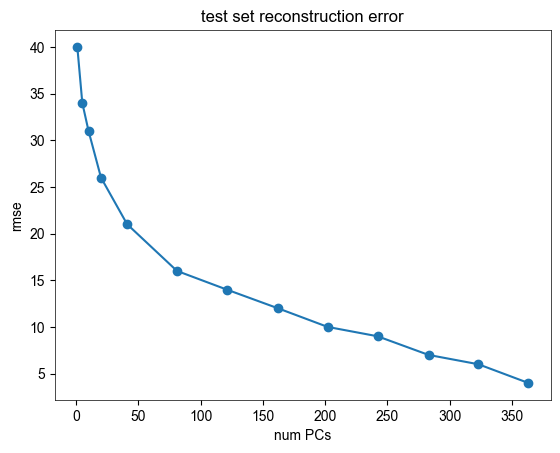

In [262]:
fig, ax = plt.subplots()
xs = Ks
ys = RMSE_test
plt.title("test set reconstruction error")
plt.xlabel("num PCs")
plt.ylabel("rmse")
ax.plot(xs, ys, marker="o")
plt.show()

In [263]:
xs = np.arange(1, 51)
ys = evals[0:50]
xs.shape, ys.shape, evals.shape

((50,), (50,), (485,))

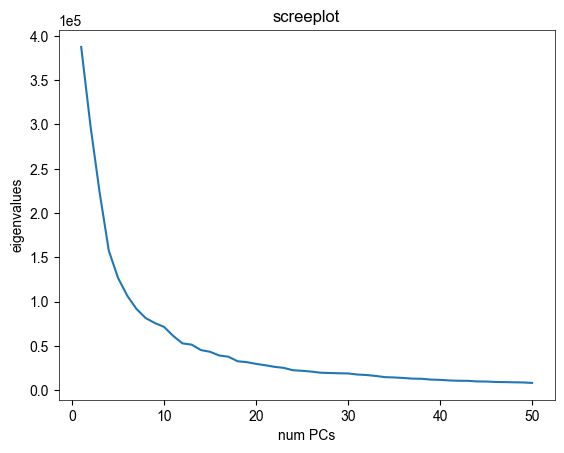

In [264]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = evals[0:50]
plt.title("screeplot")
plt.xlabel("num PCs")
plt.ylabel("eigenvalues")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax.plot(xs, ys)
plt.show()

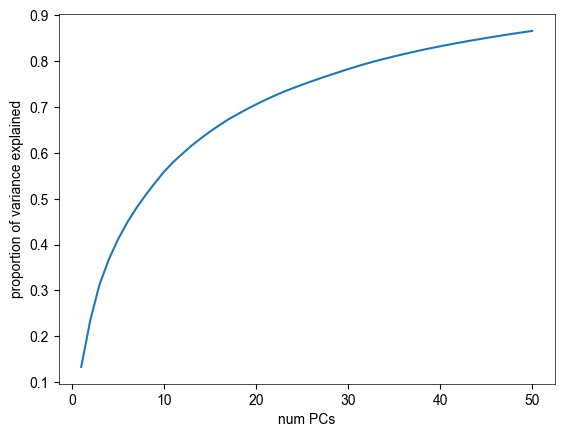

In [265]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = fraction_var
plt.xlabel("num PCs")
plt.ylabel("proportion of variance explained")
ax.plot(xs, ys)
plt.show()

In [266]:
def log_likelihood(evals):

    Lmax = len(evals)
    ll = np.arange(0.0, Lmax)

    for L in range(Lmax):

        group1 = evals[0 : L + 1]  # Divide Eigenvalues in two groups
        group2 = evals[L + 1 : Lmax]

        mu1 = np.mean(group1)
        mu2 = np.mean(group2)

        # eqn (20.30)
        sigma = (np.sum((group1 - mu1) ** 2) + np.sum((group2 - mu2) ** 2)) / Lmax

        ll_group1 = np.sum(multivariate_normal.logpdf(group1, mu1, sigma))
        ll_group2 = np.sum(multivariate_normal.logpdf(group2, mu2, sigma))

        ll[L] = ll_group1 + ll_group2  
    return ll

In [267]:
ll = log_likelihood(evals)

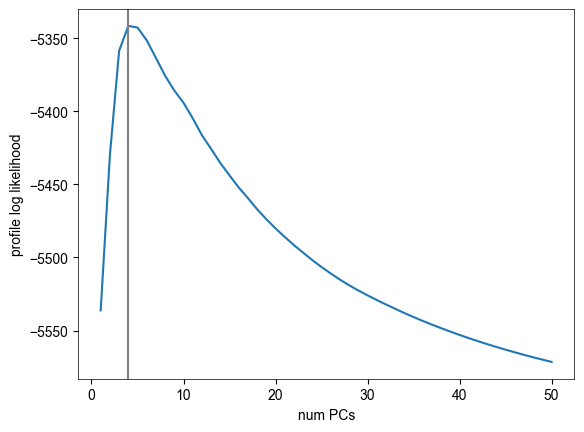

In [268]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = ll[0:50]

plt.xlabel("num PCs")
plt.ylabel("profile log likelihood")
plt.plot(xs, ys)
idx = np.argmax(ys)
plt.axvline(xs[idx], c='grey')
plt.show()